<h2 style="width: 100%; margin: 0;">
  <span style="float: left;">Author: Tshembani Mathebula</span>
  <span style="float: right;">10 September 2025</span>
</h2>
<hr>

# Logistic Regression Project On Bank Marketing

The data used in this project comes from a Portugese Bank's marketing campaign to determine if the campaign had an impact on a client depositing money into a term deposit.
- This data source has more economical metrics for more analysis and predictions compared to the initial data that was taken from the bank.
- The data comes from a Portugese Bank and has been used in research papers.
- I will be using the data for logistics regression to determine whether a client has a term deposit or not using the features of the data.

# There are multiple variables that are important to understand the project.

## Column Descriptions — Portuguese Bank Marketing Dataset

### Client-related attributes
- **age**: age of the client (numeric).
- **job**: type of job (categorical; e.g., admin, technician, blue-collar, etc.).
- **marital**: marital status (categorical; e.g., single, married, divorced).
- **education**: level of education (categorical; e.g., basic, secondary, tertiary, unknown).
- **default**: whether the client has credit in default (categorical: yes, no, unknown).
- **housing**: whether the client has a housing loan (categorical: yes, no, unknown).
- **loan**: whether the client has a personal loan (categorical: yes, no, unknown).

---

### Campaign-related attributes
- **contact**: communication type (categorical: cellular, telephone).
- **month**: last contact month of year (categorical: jan, feb, ..., dec).
- **day_of_week**: last contact day of the week (categorical: mon, tue, ..., fri).
- **duration**: last contact duration in seconds (numeric).  
  **Important note:** this is highly predictive but only known *after* the call, so it cannot be used in a real predictive model.

---

### Campaign performance attributes
- **campaign**: number of contacts performed during this campaign for this client (numeric, includes last contact).
- **pdays**: number of days since the client was last contacted from a previous campaign (numeric; -1 means never contacted).
- **previous**: number of contacts performed before this campaign (numeric).
- **poutcome**: nutcome of the previous marketing campaign (categorical: success, failure, nonexistent).

---

### Socio-economic context attributes
- **emp.var.rate**: employment variation rate — quarterly indicator (numeric).
- **cons.price.idx**: consumer price index — monthly indicator (numeric).
- **cons.conf.idx**: consumer confidence index — monthly indicator (numeric).
- **euribor3m**: : euribor 3 month rate - daily indicator (numeric).
- **nr.employed**: number of employees — quarterly indicator (numeric).

---

### Target variable
- **y**: has the client subscribed to a term deposit? (binary: yes = 1, no = 0)

---


# EDA 
Exploratory Data Analysis to look at the data and find any insights before building the model to determine whether the client had a term deposit or not based on certain factors.

In [3]:
'''
First, let's import all the necessary libraries for our study.
'''

# Data and Numerical Analysis
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None) # Applying to see all the columns and how the data looks

In [4]:
# The delimiter was not the default comma, here I am changing it to semi-colon as per the file
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Key observations from high level data view:

- The data seems to have all entries filled, more checks will be done to see if there is missing data
- The data does not seem to have a lot of varialibility in entries
- There is a balance of numerical object/categorical columns

In [6]:
pd.reset_option('display.max_columns') # Taking back the columns to the default format

In [7]:
df.columns # Quick look at all the columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### The data columns have the following:
- The shape of the data is 41888 rows and 21 columns(including the target)
- Most columns are object based columns, there are no categoricals at all
- There are no nulls in the data
- The numerical columns are both in the int and float datatypes

I have noted that the object columns consist of limited categories/groups and as such will be converted to categories later on to also save memory usage.

In [10]:
df.describe() # Key statistics on the data to see an overview of the numerical columns 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### These were observed from the summarised statistics:
- The duration and campaign columns seem to have outliers

### Data Visualisation
- Creating visuals to clearly understand key insights of the data, these will show any correlations and frequency of specific features.
- This is a very important step that will also inform how the machine learning model will be performed later on.

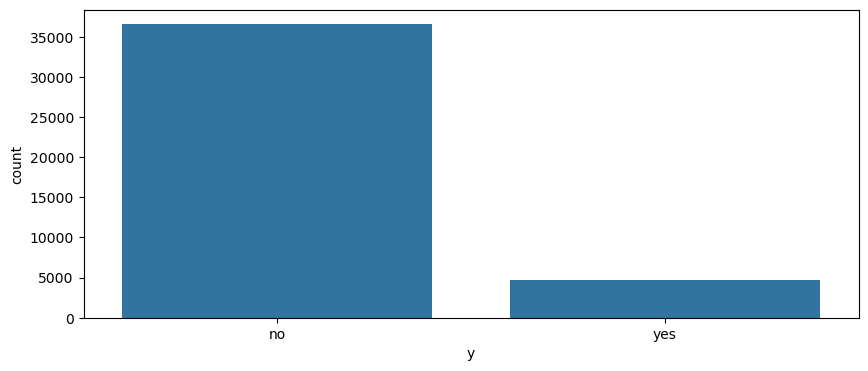

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x='y', data=df)
plt.show()

In [14]:
no = df['y'].value_counts().loc['no']
yes = df['y'].value_counts().loc['yes']
y_total = no + yes
print(f'The percent of clients who did not deposit a term deposit is {(no/y_total)*100:.2f}%')
print(f'The percent of clients who did deposited a term deposit is {(yes/y_total)*100:.2f}%', end='')

The percent of clients who did not deposit a term deposit is 88.73%
The percent of clients who did deposited a term deposit is 11.27%

From the results of the those who joined vs those who did not join it is clear most clients were not interested in a term deposit <br>
So many participants do not have a term loan, it seems the campaign was not very effective at convincing bank members into a term deposit

Age is generally associated with a certain economic status as earning potential increases with age, this is a key metric for a bank. <br>
From the data statistics summary, age ranges from **17 all the way to 98**, as such let us group the ages into different group to see how a specific age range is likely to **do a term deposit**

In [17]:
def classify_age(age):
    if age > 64:
        return 'senior' # ages between 65 and 98
    elif age >= 50:
        return 'late adult' # ages between 50 and 64
    elif age >= 35:
        return 'adult' # ages between 35 and 49
    elif age >= 25:
        return 'young adult' # ages between 25 and 34
    else:
        return 'young' # any age between 17 and 24

df['age_group'] = df['age'].apply(classify_age)

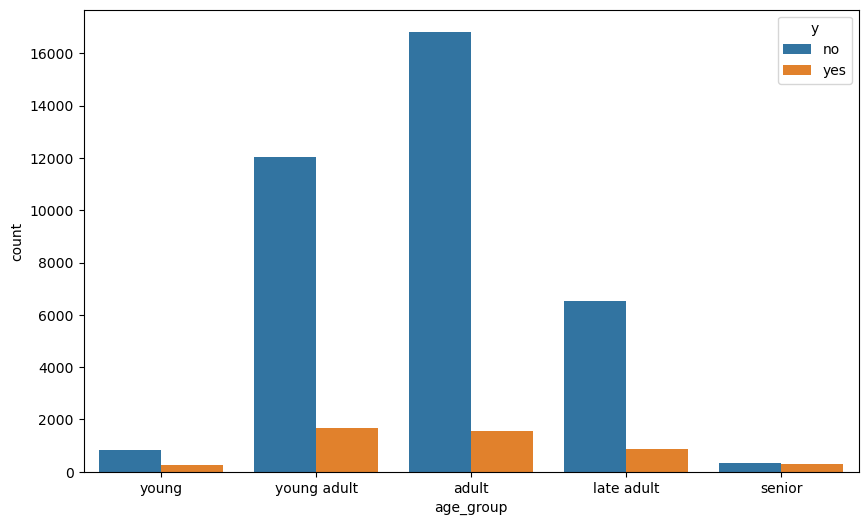

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, order=['young','young adult','adult','late adult','senior'], hue='y')
plt.show()

- Most of the participants in the marketing campain are adults (35-49) followed by the young adults
- The adults were also the most population percentage wise to not do the term deposit
- The seniors showed far higher chance of subscribing to the term deposit with those subscribing and those not subscribing almost tying

<Axes: xlabel='y', ylabel='count'>

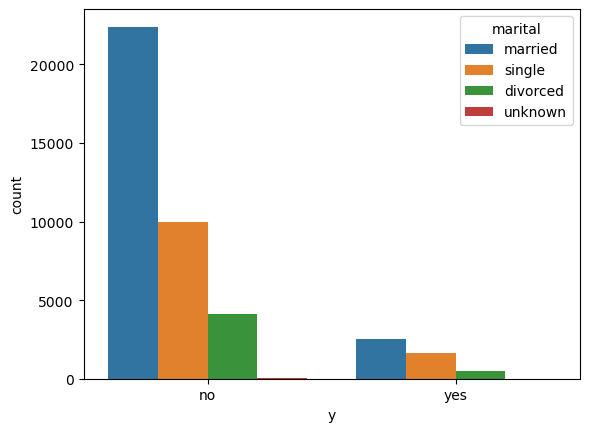

In [20]:
sns.countplot(x='y', data=df, hue='marital')

- Most of the banks clients are married, this also makes sense given that most of the banks clients in the campaign were adults
- The married couple were the least to do the term deposit, this further supports the reluctancy of adult aged participants
- Single clients have shown the highest chance in doing a term deposit
- It seems other clients either did not want to disclose their relationship status, marked as `unknown`

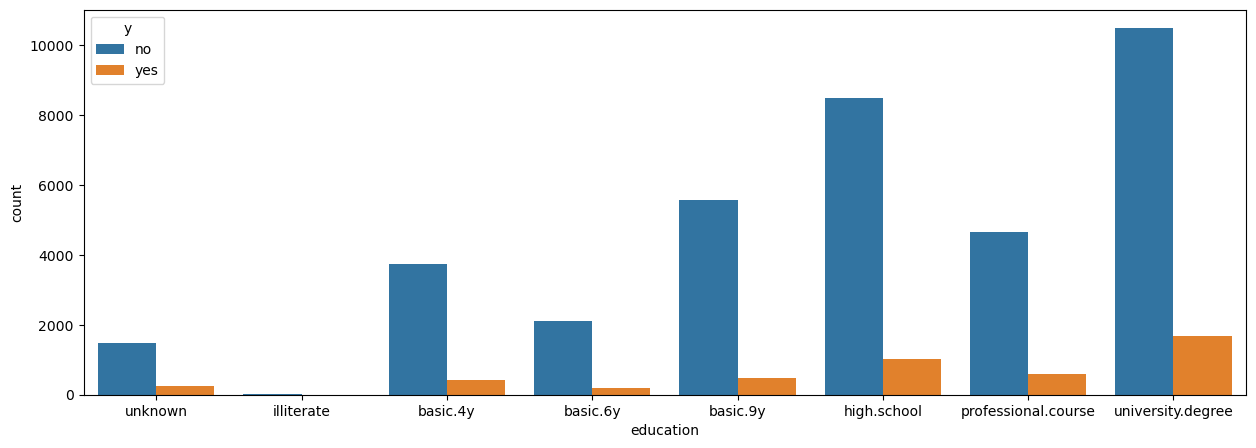

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='education', data=df, order=['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
                                     'high.school', 'professional.course', 'university.degree'], hue='y')
plt.show()

- The clients with a university degrees were the most participants in the survey and the most to do a term deposit.
- The illiterate ones basically did not participate in the survey having shown almost no participation
- Generally the more educated one was the higher was the chance of participation and subscribing on a count basis.

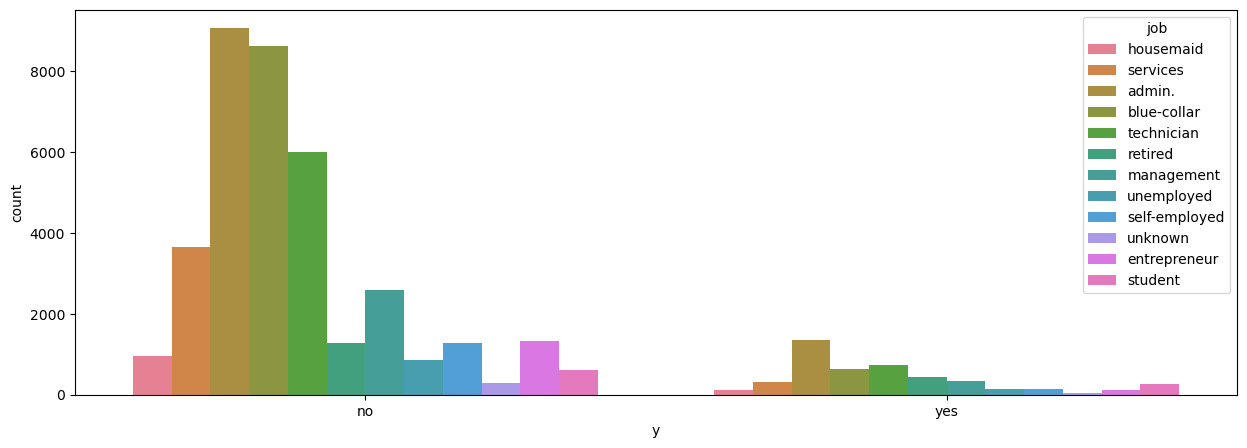

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(x='y', data=df, hue='job')
plt.show()

- The highest job status was working as an admin, this is much expected for a **2008 jobs market that was less automated**
- The least known participants were still students as students generally do not money compared to the working class
- Most clients that subscribed to the term deposit were the retired group
- There was few clients whose job was unknown

#### Creating the boxplot to clearly see the data distribution and any outliers in the numerical columns

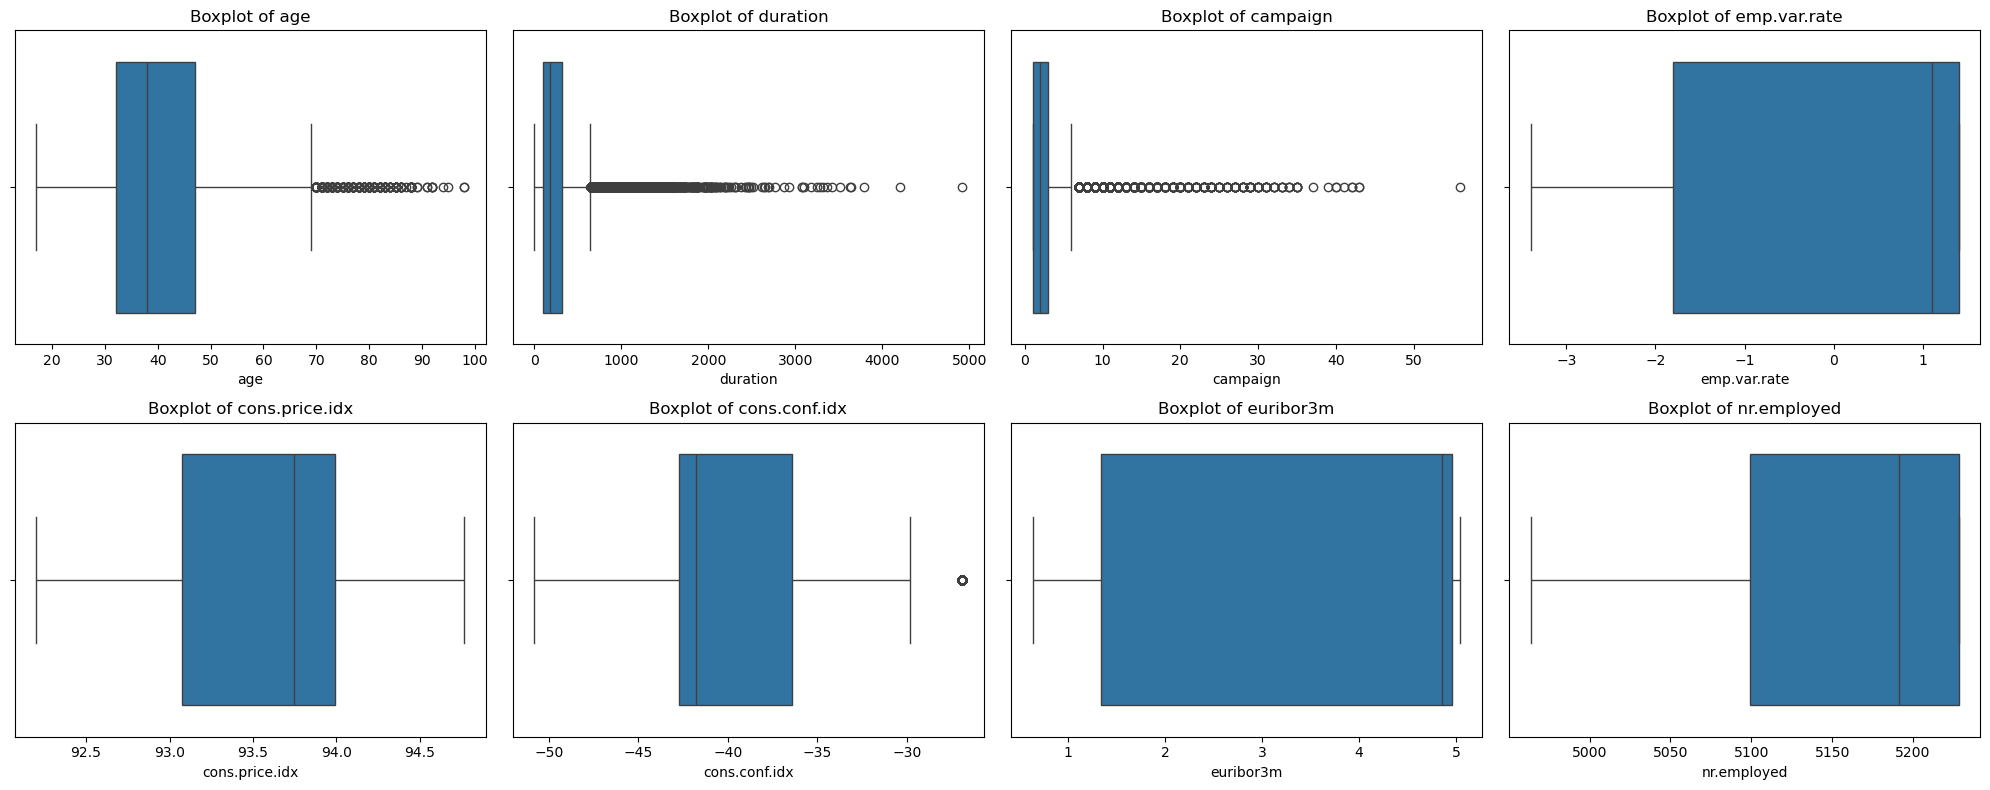

In [27]:
# Select numeric columns excluding specific columns
numeric_cols = df.drop(['pdays', 'previous'], axis=1).select_dtypes(include=['number']).columns
n = len(numeric_cols)

rows, cols = 2, 4 # 2x4 grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i >= rows * cols:
        break
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### These columns have outliers:
- The age has outliers to the right
- Duration has outliers to the right
- Campaign is the column with the most outliers to the right

In [29]:
df.drop('age_group', axis=1, inplace=True)

From the visualisations is seems like the categoricals all have unknown as part of the entries, this will be replaced with the mode of the columns since the columns are objects

In [31]:
# Impute 'unknown' in all categorical columns with the mode (most frequent entry)
for col in df.select_dtypes(include='category'):
    # compute mode excluding 'unknown'
    mode_val = df.loc[df[col] != 'unknown', col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)

In [32]:
def remove_outliers_iqr(df, column):
    """
    Removes outliers from a column in a DataFrame using the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to clean
columns_to_clean = ["age", "duration", "campaign"]

# Apply IQR outlier removal
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

# Result
print(f"✅ Outliers removed. Remaining rows: {len(df)}")

✅ Outliers removed. Remaining rows: 35535


In [33]:
# Selecting all the columns that contain `object` data
categoricals = df.select_dtypes(include=['object']).columns

# Converting all object strings to categoricals for better storage, memory usage and preparing for machine learning
df[categoricals] = df[categoricals].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35535 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             35535 non-null  int64   
 1   job             35535 non-null  category
 2   marital         35535 non-null  category
 3   education       35535 non-null  category
 4   default         35535 non-null  category
 5   housing         35535 non-null  category
 6   loan            35535 non-null  category
 7   contact         35535 non-null  category
 8   month           35535 non-null  category
 9   day_of_week     35535 non-null  category
 10  duration        35535 non-null  int64   
 11  campaign        35535 non-null  int64   
 12  pdays           35535 non-null  int64   
 13  previous        35535 non-null  int64   
 14  poutcome        35535 non-null  category
 15  emp.var.rate    35535 non-null  float64 
 16  cons.price.idx  35535 non-null  float64 
 17  cons.conf.idx   3

In [34]:
# Convert the 'y' column to binary: 'no' becomes 0, 'yes' becomes 1
df['y'] = df['y'].map({'no':0, 'yes':1})
categoricals = categoricals.drop('y')
print(categoricals)

# Convert categorical columns into one-hot encoded dummy variables (drop the first category to avoid multicollinearity),
# Convert all resulting columns to integers
df = pd.get_dummies(df, columns=categoricals, drop_first=True).astype('int')
df

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1,93,-36,4,5191,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,281,1,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0
41182,29,112,1,9,1,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,0,1
41184,46,383,1,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1,94,-50,1,4963,...,0,1,0,0,0,0,0,0,1,0


In [35]:
correlation = df.corr()

In [36]:
print(f'Top 10 features with a positive correlation: \n {correlation['y'].sort_values(ascending=False).head(10)} \n')
print(f'Top 10 features with a negative correlation: \n {correlation['y'].sort_values(ascending=True).head(10)}')

Top 10 features with a positive correlation: 
 y                   1.000000
poutcome_success    0.369379
duration            0.268103
previous            0.266182
month_mar           0.180567
month_oct           0.169033
month_sep           0.147969
job_student         0.117007
month_dec           0.087686
cons.conf.idx       0.074761
Name: y, dtype: float64 

Top 10 features with a negative correlation: 
 nr.employed            -0.411465
pdays                  -0.379782
euribor3m              -0.375413
emp.var.rate           -0.366441
poutcome_nonexistent   -0.222648
contact_telephone      -0.148575
month_may              -0.123873
default_unknown        -0.114845
job_blue-collar        -0.087954
cons.price.idx         -0.081626
Name: y, dtype: float64


The target variable y shows strongest positive correlation with:

duration (0.41): Longer call durations are strongly associated with positive outcomes. <br>
poutcome_success (0.32): Previous successful campaigns strongly increase the chance of a positive outcome. <br>
previous (0.23): More prior contacts correlate with higher success rates. <br>
Some specific months (March, October, September, December) and jobs (student, retired) show mild positive relationships with success.

The strongest negative correlations are with:

nr.employed (-0.35) and euribor3m (-0.33): Higher employment numbers and interest rates are associated with fewer positive outcomes. <br>
pdays (-0.32): A long gap since last contact reduces success likelihood. <br>
emp.var.rate (-0.32): Higher employment variation rate correlates negatively with success.

Other weaker negative correlations include contact method (telephone), month May, default_unknown, job_blue-collar, and cons.price.idx.

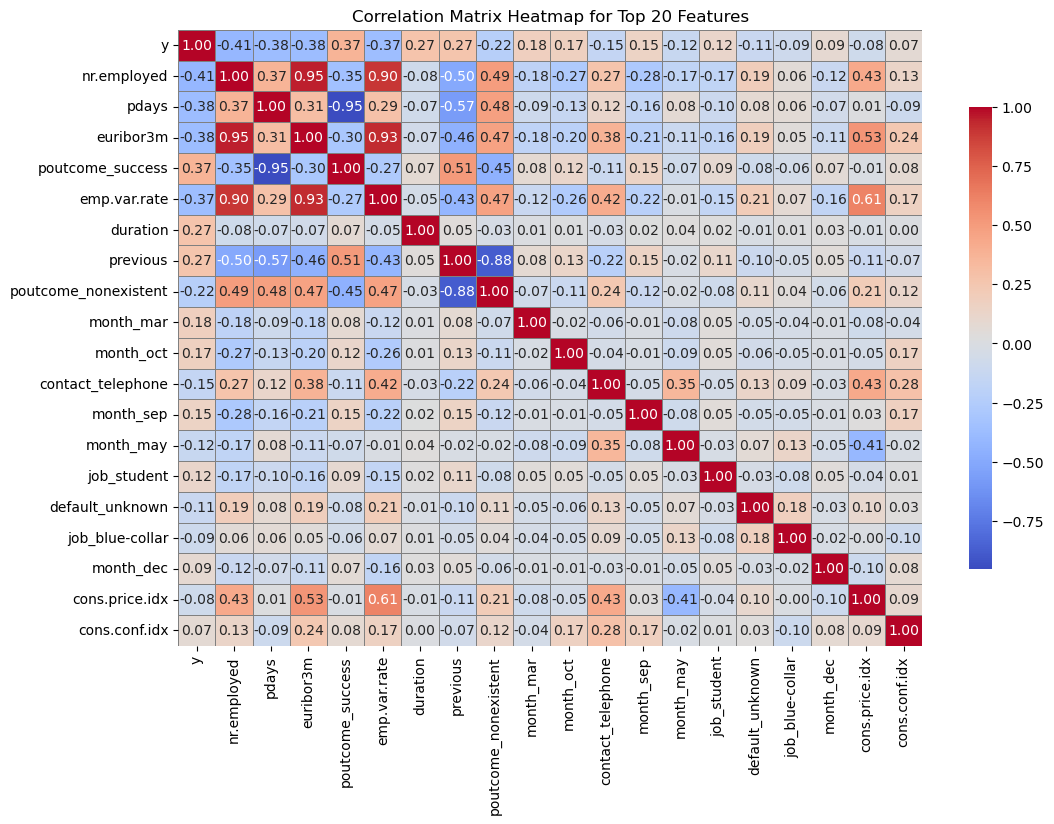

In [38]:
# Assuming df is your DataFrame and 'y' is the target variable

# Step 1: Calculate correlation matrix for all features
correlation = df.corr()  # Get correlation matrix for all features

# Step 2: Get the correlation with the target 'y' and sort by absolute value
top_features = correlation['y'].abs().sort_values(ascending=False).head(20).index  # Top 20 features based on correlation with 'y'

# Step 3: Extract the subset of the correlation matrix for just the top 20 features
correlation_subset = df[top_features].corr()  # Get correlation matrix for these features

# Step 4: Generate the heatmap
plt.figure(figsize=(12, 8))  # Set figure size for better readability
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, linecolor='gray', cbar_kws={'shrink': 0.75})

# Step 5: Show the heatmap
plt.title("Correlation Matrix Heatmap for Top 20 Features")
plt.show()

# generally do after feature engineering, looking at all the features, 90%, colinearity

The following features have a strong correlation:
- euribor3m and nr.employed (0.95)
- emp.var.rate and nr.employed of (0.90)
- emp.var.rate and euribor3m (0.93)
- poutcome_success and pdays (-0.95)
- poutcome_nonexistent and previous (-0.88)

Given there are many features in the data and strong correlation of other features, Principal Component Analysis will be perfomed on the feautures to reduce redundancy and use the most useful features.

In [40]:
y = df.pop('y')
df['y'] = y
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1,93,-36,4,5191,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,281,1,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,0,1,0,1
41182,29,112,1,9,1,-1,94,-50,1,4963,...,1,0,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1,94,-50,1,4963,...,1,0,0,0,0,0,0,1,0,0


In [41]:
df.shape

(35535, 54)

In [42]:
X = df.drop(['y'], axis=1)
y = df['y']

In [43]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.69458877,  0.38696895, -0.81304091, ..., -0.49520248,
         0.40286483, -0.18304352],
       [ 1.79791434, -0.41261522, -0.81304091, ..., -0.49520248,
         0.40286483, -0.18304352],
       [-0.26859705,  0.13709889, -0.81304091, ..., -0.49520248,
         0.40286483, -0.18304352],
       ...,
       [ 0.66133308,  1.25794455, -0.81304091, ..., -0.49520248,
         0.40286483, -0.18304352],
       [ 1.69458877, -0.12704945, -0.03431773, ..., -0.49520248,
         0.40286483, -0.18304352],
       [ 0.45468194,  1.67915407, -0.81304091, ..., -0.49520248,
         0.40286483, -0.18304352]])

In [44]:
# Convert the scaled numpy array back into a DataFrame with the same column names as X
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable ('y') back to the scaled dataset
scaled_df['y'] = y.values 
scaled_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,1.694589,0.386969,-0.813041,0.192362,-0.354660,0.768202,0.145666,0.889957,0.692828,0.342229,...,-0.341277,-0.130384,-0.114393,1.934372,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
1,1.797914,-0.412615,-0.813041,0.192362,-0.354660,0.768202,0.145666,0.889957,0.692828,0.342229,...,-0.341277,-0.130384,-0.114393,1.934372,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
2,-0.268597,0.137099,-0.813041,0.192362,-0.354660,0.768202,0.145666,0.889957,0.692828,0.342229,...,-0.341277,-0.130384,-0.114393,1.934372,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
3,0.041380,-0.398337,-0.813041,0.192362,-0.354660,0.768202,0.145666,0.889957,0.692828,0.342229,...,-0.341277,-0.130384,-0.114393,1.934372,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
4,1.694589,0.715370,-0.813041,0.192362,-0.354660,0.768202,0.145666,0.889957,0.692828,0.342229,...,-0.341277,-0.130384,-0.114393,1.934372,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35530,-0.268597,0.529752,-0.813041,0.192362,-0.354660,-1.030919,1.837251,-2.117043,-1.228781,-2.843761,...,2.930174,-0.130384,-0.114393,-0.516964,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,1
35531,-1.095202,-0.676764,-0.813041,-5.182173,1.672498,-1.030919,1.837251,-2.117043,-1.228781,-2.843761,...,2.930174,-0.130384,-0.114393,-0.516964,-0.509042,-0.49758,-0.495202,-2.482222,5.463182,0
35532,0.661333,1.257945,-0.813041,0.192362,-0.354660,-1.030919,1.837251,-2.117043,-1.228781,-2.843761,...,2.930174,-0.130384,-0.114393,-0.516964,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0
35533,1.694589,-0.127049,-0.034318,0.192362,-0.354660,-1.030919,1.837251,-2.117043,-1.228781,-2.843761,...,2.930174,-0.130384,-0.114393,-0.516964,-0.509042,-0.49758,-0.495202,0.402865,-0.183044,0


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
pca_result = pca.fit_transform(scaled_df)

print(f"Number of components to explain 95% variance: {pca.n_components_}")

Number of components to explain 95% variance: 39


### Explained and Cumulative Variance from PCA

**Explained Variance per Component**  
  Represents the proportion of the dataset’s total variance accounted for by each principal component.  
  This metric highlights the relative importance of each component in capturing variability within the data.

**Cumulative Explained Variance**  
  Represents the aggregated proportion of variance explained as successive components are included.  
  This measure is used to determine the optimal number of components to retain, balancing dimensionality reduction with information preservation. 
  




In [46]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(f"Explained Variance per Component: \n\n{explained_variance} \n")
print(f"Cumulative Explained Variance: \n\n{cumulative_variance}")

Explained Variance per Component: 

[0.09569983 0.04554936 0.04440197 0.03981218 0.03775064 0.03279888
 0.03145014 0.0308997  0.02837227 0.02603727 0.02427437 0.02370254
 0.02337274 0.02298295 0.02189514 0.02097974 0.02058113 0.02017
 0.01979521 0.0196711  0.01958564 0.01949137 0.01911978 0.01903998
 0.01893304 0.01884987 0.01862601 0.01856002 0.01848775 0.0177106
 0.01741235 0.01717618 0.01680945 0.01579157 0.01549748 0.01434154
 0.01374224 0.01329997 0.01054072] 

Cumulative Explained Variance: 

[0.09569983 0.14124918 0.18565115 0.22546334 0.26321397 0.29601285
 0.32746299 0.35836269 0.38673496 0.41277223 0.4370466  0.46074914
 0.48412187 0.50710482 0.52899996 0.5499797  0.57056082 0.59073082
 0.61052603 0.63019713 0.64978278 0.66927415 0.68839393 0.70743391
 0.72636695 0.74521682 0.76384284 0.78240285 0.8008906  0.8186012
 0.83601356 0.85318974 0.86999919 0.88579076 0.90128824 0.91562978
 0.92937202 0.94267199 0.95321271]


**Explained Variance per Component**   
- **PC1** explains **9.57%** of the variance, while **PC2** explains **4.55%**, and **PC3** explains **4.44%**.  
- This means the first three components together capture about **18.56%** of the dataset’s information.
- The same notion applies for the other components all the way to the required variance as per the cumulative variance below.

**Cumulative Explained Variance**     
- For **95% coverage**, **39 components** are required.  

In [47]:
print(f"Number of components to explain 95% variance: {pca.n_components_}")

Number of components to explain 95% variance: 39


In [48]:
# Convert PCA results to DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,1.566583,1.373981,-1.256795,-0.401386,0.325281,1.264286,-1.175884,0.560052,-0.156940,0.553252,...,0.316701,0.088119,-0.824074,0.558569,-0.856444,0.222381,-0.208853,0.390305,0.243567,-0.183683
1,1.748873,1.861185,-0.364824,0.420986,-0.633930,1.426601,-1.650468,3.158228,-0.259545,-0.033740,...,0.127159,0.337760,-0.784157,-1.432762,1.408230,-0.045530,0.464496,0.756317,-0.332551,-0.011772
2,1.255924,0.956820,0.566469,0.432976,-1.046909,1.391513,-1.578663,2.892661,0.003226,-0.622413,...,0.079296,1.278440,0.469393,-0.200053,-0.539913,0.553077,-0.200325,1.047606,-0.113968,-0.314719
3,1.494489,1.712410,-0.343303,0.090440,-0.116003,1.183582,-0.625401,-0.406668,0.018272,-0.096917,...,0.859877,0.459569,-1.142796,-0.059332,-1.513125,0.200067,-0.371612,1.015415,0.542485,1.117929
4,1.402384,1.381208,-0.094341,0.249846,-0.743937,1.401681,-1.776814,3.152504,0.026309,-0.349050,...,0.878726,-0.361127,-1.670906,-0.067002,0.095848,0.795303,0.046216,0.828933,0.202923,0.005586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35530,-1.857135,-0.181382,0.157025,-1.048761,0.615303,-2.167923,-1.101876,-0.352846,2.285682,-0.238812,...,-0.285683,0.269728,0.577980,0.717610,-0.267644,-0.225713,0.851848,0.346675,-1.908850,-0.411609
35531,-6.502707,-1.546997,-2.961241,2.133952,-3.383718,-2.432567,1.040931,-0.397134,0.548852,-1.872826,...,-0.657047,-0.361857,0.254814,0.136277,-1.185358,0.455048,2.808155,-0.210812,-0.088916,-0.036252
35532,-1.452943,1.188629,-0.131953,-0.724617,0.557703,-1.177404,1.532773,-0.084984,2.969978,0.030963,...,0.469895,-0.731875,-0.654896,1.018642,0.287402,-0.355681,1.218450,-0.468136,-0.173680,-2.317952
35533,-1.704244,0.520717,-1.309083,-1.920012,1.370716,-2.073151,-1.459710,0.722511,2.307896,1.482878,...,0.186915,0.470611,0.379770,0.807896,-1.610661,-0.390789,0.783864,1.025149,-1.881868,-0.289993


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)

### Model Evaluation

- Purpose: Assess the performance of the trained logistic regression model on the unseen test dataset.  
- Metric Used: Accuracy, which measures the proportion of correctly classified observations out of all test samples.  
- Interpretation: A higher accuracy indicates better generalization of the model to new data. However, accuracy alone may be insufficient if the dataset is imbalanced, and should ideally be complemented with additional metrics (e.g., precision, recall, F1-score).


In [52]:
# Optionally, evaluate the model (e.g., on the test set)
accuracy = lr.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9355564935978613


- Test Accuracy: The logistic regression model achieved an accuracy of **93.56%** on the test dataset.  
- Interpretation: This means that approximately **94 out of 100 test observations** were correctly classified by the model.  

In [ ]:
### Classification Report

- **Overview**: Provides detailed evaluation metrics for each class in the test dataset, including **precision**, **recall**, **F1-score**, and **support** (number of samples per class). 

In [53]:
# Classification report for detailed metrics
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6513
           1       0.70      0.41      0.51       594

    accuracy                           0.94      7107
   macro avg       0.82      0.69      0.74      7107
weighted avg       0.93      0.94      0.93      7107



**Class 0 (majority class)**:  
- Precision: 0.95 → 95% of predictions for class 0 are correct.  
- Recall: 0.98 → 98% of actual class 0 instances are correctly identified.  
- F1-score: 0.97 → High overall performance for this class.  

**Class 1 (minority class)**:  
- Precision: 0.70 → 70% of predictions for class 1 are correct.  
- Recall: 0.41 → Only 41% of actual class 1 instances are correctly identified, indicating lower sensitivity.  
- F1-score: 0.51 → Moderate balance between precision and recall, showing the model struggles with the minority class.  

**Overall metrics**:  
- Accuracy: 0.94 → 94% of total predictions are correct.  
- Macro average: Reflects unweighted average across classes (precision 0.82, recall 0.69, F1 0.74), showing class imbalance effects.  
- Weighted average: Accounts for class frequencies (precision 0.93, recall 0.94, F1 0.93), aligning with overall accuracy.  

**Insight**: The model performs very well on the majority class but has limited recall for the minority class. 


### Confusion Matrix

**Overview**: The confusion matrix summarizes the model’s predictions against the true labels for the test dataset. Each element shows the number of instances for the corresponding predicted vs. actual class.

In [54]:
# Confusion matrix
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Confusion matrix:
[[6408  105]
 [ 353  241]]


**Interpretation**:
- True Negatives (TN): 6408 → Class 0 instances correctly predicted as 0.  
- False Positives (FP): 105 → Class 0 instances incorrectly predicted as 1.  
- False Negatives (FN): 353 → Class 1 instances incorrectly predicted as 0.  
- True Positives (TP): 241 → Class 1 instances correctly predicted as 1.

**Insight**: The model performs well on the majority class (class 0) but struggles to correctly identify the minority class (class 1), consistent with the low recall observed in the classification report. This highlights the effect of class imbalance and suggests that additional techniques such as **resampling, class weighting, or alternative thresholds** could be applied to improve minority class detection.


# Project Summary

This project applied **logistic regression** to predict client subscription outcomes in the **2008 Portuguese bank marketing campaign** dataset. The model achieved a **test accuracy of 93.56%**, indicating strong overall predictive performance. Evaluation using a **classification report** revealed excellent performance on the majority class (non-subscribers) with high precision (0.95), recall (0.98), and F1-score (0.97), but lower performance on the minority class (subscribers), showing recall of 0.41 and F1-score of 0.51.  

The **confusion matrix** corroborates these findings: most non-subscribers were correctly classified (6408 true negatives), while a substantial number of actual subscribers were misclassified (353 false negatives). This reflects the inherent **class imbalance** in the campaign data, where subscription events were relatively rare.  

Overall, while the model is effective at identifying clients unlikely to subscribe, further refinement—such as **resampling, class weighting, or threshold tuning**—is recommended to improve detection of potential subscribers, thereby providing actionable insights for optimizing future marketing campaigns.